In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [ ]:
(train_images, train_labels),(test_images, test_labels) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [ ]:
train_images, test_images = train_images / 255.0, test_images / 255.0

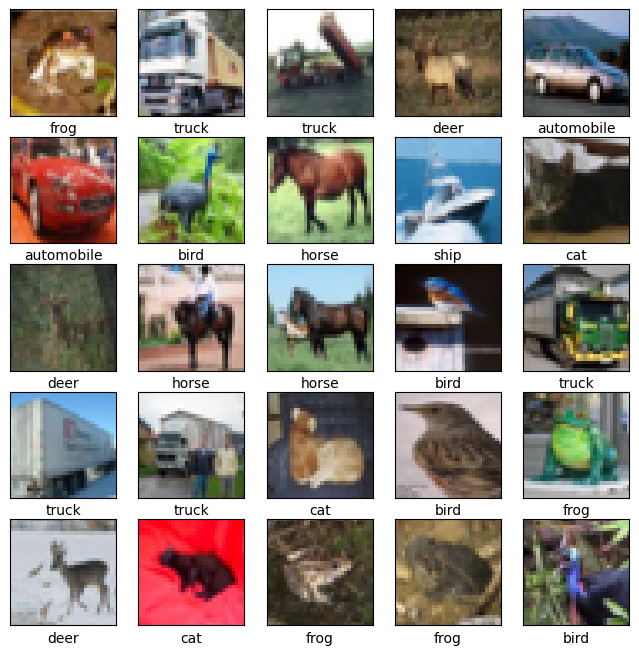

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(8,8))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays,
    #which is why we need the extra index
    plt.xlabel(class_names[train_labels[i][0]])

plt.show()

In [ ]:
model = tf.keras.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPool2D(2, 2))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.MaxPool2D(2, 2))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(10, activation = 'softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 1024)             

In [ ]:
model.compile(optimizer = 'adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics = ['accuracy'])

In [ ]:
history = model.fit(train_images, train_labels, epochs = 10, validation_data = (test_images, test_labels), batch_size = 128)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


391/391 [==============================] - 73s 182ms/step - loss: 1.6685 - accuracy: 0.3930 - val_loss: 1.4061 - val_accuracy: 0.4872
Epoch 2/10
391/391 [==============================] - 73s 186ms/step - loss: 1.3075 - accuracy: 0.5326 - val_loss: 1.2376 - val_accuracy: 0.5597
Epoch 3/10
391/391 [==============================] - 69s 177ms/step - loss: 1.1648 - accuracy: 0.5896 - val_loss: 1.1112 - val_accuracy: 0.6084
Epoch 4/10
391/391 [==============================] - 69s 176ms/step - loss: 1.0583 - accuracy: 0.6295 - val_loss: 1.0153 - val_accuracy: 0.6433
Epoch 5/10
391/391 [==============================] - 69s 176ms/step - loss: 0.9846 - accuracy: 0.6549 - val_loss: 0.9844 - val_accuracy: 0.6538
Epoch 6/10
391/391 [==============================] - 69s 176ms/step - loss: 0.9207 - accuracy: 0.6771 - val_loss: 0.9695 - val_accuracy: 0.6619
Epoch 7/10
391/391 [==============================] - 71s 182ms/step - loss: 0.8669 - accuracy: 0.6972 - val_loss: 0.8952 - val_accuracy: 0.6

In [ ]:
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,
                                     test_labels,
                                     verbose=2)

313/313 - 5s - loss: 0.8514 - accuracy: 0.7117 - 5s/epoch - 17ms/step


In [ ]:
print('Test Accuracy is',test_acc)

Test Accuracy is 0.7117000222206116
